## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df2 = pd.read_csv('Data_grouped_by_date.csv', parse_dates=['date'], infer_datetime_format=True)

In [2]:
#create list to hold model results

Iron_R2 = []
Iron_MAE = []
Iron_MSE = []

Silica_R2 = []
Silica_MAE = []
Silica_MSE = []

## Baseline model with Regression 

### A) Predicting Iron Concentrate 

Baseline Model Iron Concentrate
Train R2 Score: 0.165
MAE Score: 0.818
MSE Score: 1.05
Test R2 Score: 0.165


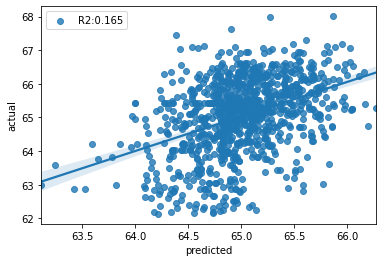


Most Important Features:


,features,Coefficient
6,Ore Pulp Density,4.185835
5,Ore Pulp pH,0.464057
10,Flotation Column 04 Air Flow,-0.045368
0,% Iron Feed,0.041912
1,% Silica Feed,0.031890


In [3]:
#creating baseline model to predict iron concentrate & silica concentrate
X = df2.iloc[:,1:22]
Y = df2['% Iron Concentrate']

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression

#initialize and fit training dataset
model = LinearRegression()
model.fit(X_train, y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
Baseline_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Baseline Model Iron Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

# Most important coefficients
a = X.columns.tolist()
b = model.coef_
c = pd.DataFrame({"features":a, "Coefficient":b})
print('\n'+'Most Important Features:')
c.sort_values(by='Coefficient', ascending=False, key = abs).head(5)

### B) Predicting Silica Concentrate 

Baseline Model Silica Concentrate
Train R2 Score: 0.185
MAE Score: 0.793
MSE Score: 0.995
Test R2 Score: 0.221


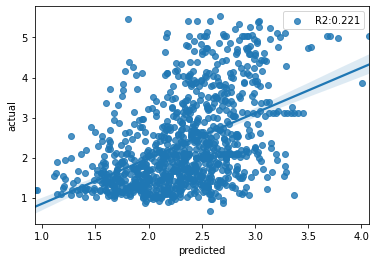


Most Important Features:


,features,Coefficient
6,Ore Pulp Density,-3.312929
5,Ore Pulp pH,-0.309529
10,Flotation Column 04 Air Flow,0.045190
11,Flotation Column 05 Air Flow,-0.014139
7,Flotation Column 01 Air Flow,-0.009760


In [4]:
#creating baseline model to predict iron concentrate & silica concentrate
X = df2.iloc[:,1:22]
Y = df2['% Silica Concentrate']

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression

#initialize and fit training dataset
model = LinearRegression()
model.fit(X_train, y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
Baseline_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Baseline Model Silica Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

# Most important coefficients
a = X.columns.tolist()
b = model.coef_
c = pd.DataFrame({"features":a, "Coefficient":b})
print('\n'+'Most Important Features:')
c.sort_values(by='Coefficient', ascending=False, key = abs).head(5)

## Normalize Data 

In [5]:
#feature enginnering
#df2['total airflow'] = df2.iloc[:,7:14].sum(axis=1)
#df2['total level'] = df2.iloc[:,14:21].sum(axis=1)
df2.drop(columns='date',inplace = True)

# Normalize and Log data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Initilize 
pt = PowerTransformer()
ss = StandardScaler()

#Power Transform -> Silica Feed, Silica Concentrate, Total Level
#Standard Scaler -> Everthing else
pt_data = df2[['% Silica Feed', '% Silica Concentrate']] #'total level']]
ss_data = df2.drop(columns=['% Silica Feed','% Silica Concentrate']) #'total level'])

#fit_transform data
df2_pt = pd.DataFrame(pt.fit_transform(pt_data), columns = pt_data.columns)
df2_ss = pd.DataFrame(ss.fit_transform(ss_data), columns = ss_data.columns)

#combine data - df3 become normalized df2 data
df3 = pd.concat([df2_pt,df2_ss], axis=1)

## Poly Reg Model

### A) Predicting Iron Concentrate 

Train R2 Score: 0.322
MAE Score: 0.729
MSE Score: 0.898
Test R2 Score: 0.122


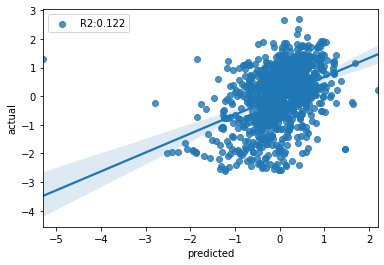

In [6]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#initialize and fit training dataset
model = make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
Polyreg_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

### B) Predicting Silica Concentrate

Optimized Model Iron Concentrate
Train R2 Score: 0.361
MAE Score: 0.719
MSE Score: 0.839
Test R2 Score: 0.174


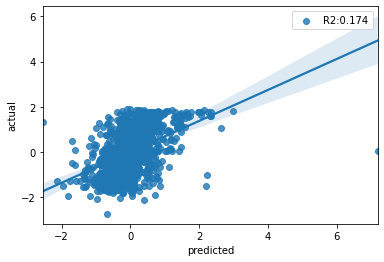

In [7]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Silica Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#initialize and fit training dataset
model = make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
Polyreg_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Optimized Model Iron Concentrate")
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

## Random Forest ModeL

### A) Predicting Iron Concentrate 

Train R2 Score: 0.904
MAE Score: 0.653
MSE Score: 0.703
Test R2 Score: 0.312


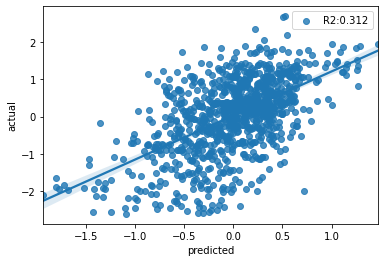

In [8]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.ensemble import RandomForestRegressor

#initialize and fit training dataset
model = RandomForestRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RandomForest_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

### B) Predicting Silica Concentrate 

Train R2 Score: 0.908
MAE Score: 0.651
MSE Score: 0.647
Test R2 Score: 0.364


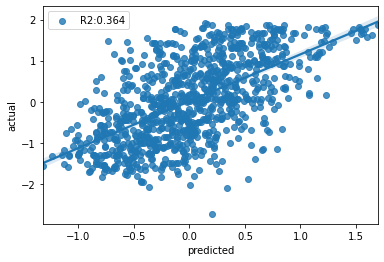

In [9]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Silica Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.ensemble import RandomForestRegressor

#initialize and fit training dataset
model = RandomForestRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RandomForest_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

## Gradient Boosting Regressor ModeL

### A) Predicting Iron Concentrate 

Train R2 Score: 0.418
MAE Score: 0.682
MSE Score: 0.736
Test R2 Score: 0.28


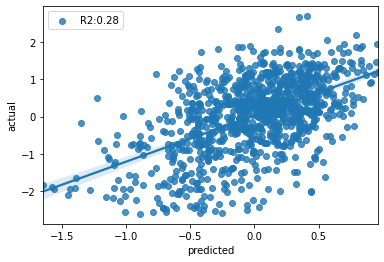

In [10]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.ensemble import GradientBoostingRegressor

#initialize and fit training dataset
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
GradientBoosting_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

### B) Predicting Silica Concentrate 

Train R2 Score: 0.449
MAE Score: 0.678
MSE Score: 0.684
Test R2 Score: 0.327


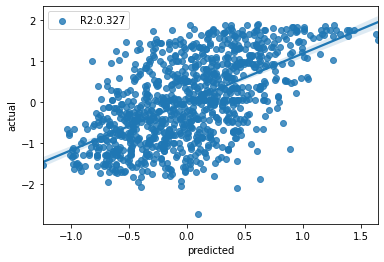

In [11]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Silica Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.ensemble import GradientBoostingRegressor

#initialize and fit training dataset
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
GradientBoosting_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

## XGBoost Regressor ModeL

### A) Predicting Iron Concentrate 

Train R2 Score: 0.966
MAE Score: 0.684
MSE Score: 0.748
Test R2 Score: 0.268


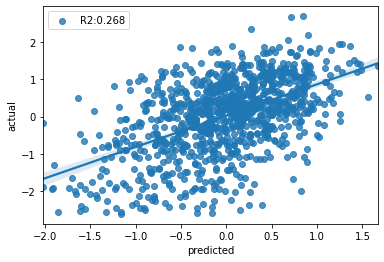

In [12]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from xgboost import XGBRegressor

#initialize and fit training dataset
model = XGBRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
XGBoost_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

### B) Predicting Silica Concentrate 

Train R2 Score: 0.963
MAE Score: 0.66
MSE Score: 0.675
Test R2 Score: 0.336


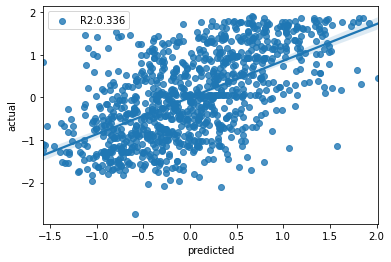

In [13]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Silica Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from xgboost import XGBRegressor

#initialize and fit training dataset
model = XGBRegressor()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
XGBoost_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

## SVR ModeL

### A) Predicting Iron Concentrate 

Train R2 Score: 0.388
MAE Score: 0.644
MSE Score: 0.734
Test R2 Score: 0.281


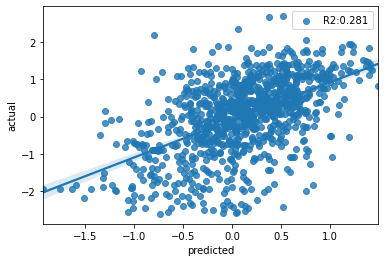

In [14]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Iron Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.svm import SVR

#initialize and fit training dataset
model = SVR()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
SVR_model_R2_Iron = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores in list
Iron_R2.append(R2)
Iron_MAE.append(MAE)
Iron_MSE.append(MSE)

### B) Predicting Silica Concentrate 

Train R2 Score: 0.438
MAE Score: 0.649
MSE Score: 0.676
Test R2 Score: 0.335


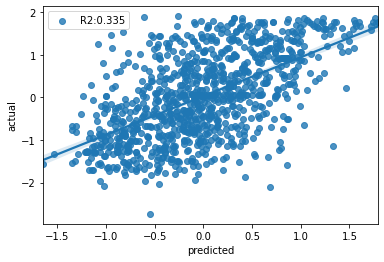

In [15]:
#creating baseline model to predict iron concentrate & silica concentrate
Y = df3['% Silica Concentrate']
X = df3.drop(columns=['% Iron Concentrate','% Silica Concentrate'])

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.svm import SVR

#initialize and fit training dataset
model = SVR()
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
SVR_model_R2_Silica = R2

#prints the model scores for your test dataset
print("Train R2 Score:", round(model.score(X_train,y_train),3))
print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

#make a graph for R2
graph = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
sns.regplot(x='predicted',y='actual',data=graph,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#append scores to list
Silica_R2.append(R2)
Silica_MAE.append(MAE)
Silica_MSE.append(MSE)

## Model Results

In [16]:
# create a results table 
Iron_df = pd.DataFrame(
    {
        "Model": ['Baseline_model','Polyreg_model','RandomForest_model','GradientBoosting_model','XGBoost_model', 'SVR_model'],
        "Iron_R2" : Iron_R2,
        "Iron_MAE" : Iron_MAE,
        "Iron_MSE" : Iron_MSE
    }

)


Silica_df = pd.DataFrame(
    {
        "Model": ['Baseline_model','Polyreg_model','RandomForest_model','GradientBoosting_model','XGBoost_model', 'SVR_model'],
        "Silica_R2" : Silica_R2,
        "Silica_MAE" : Silica_MAE,
        "Silica_MSE" : Silica_MSE
    }

)

print('% Iron Concentrate Results')
display(Iron_df)

print('% Silica Concentrate Results')
display(Silica_df)

% Iron Concentrate Results


,Model,Iron_R2,Iron_MAE,Iron_MSE
0,Baseline_model,0.164639,0.817839,1.050450
1,Polyreg_model,0.121791,0.728632,0.897550
2,RandomForest_model,0.312139,0.653270,0.703010
3,GradientBoosting_model,0.279833,0.682361,0.736027
4,XGBoost_model,0.267949,0.684299,0.748173
5,SVR_model,0.281496,0.644355,0.734328


% Silica Concentrate Results


,Model,Silica_R2,Silica_MAE,Silica_MSE
0,Baseline_model,0.220912,0.793104,0.995270
1,Polyreg_model,0.174297,0.719287,0.839405
2,RandomForest_model,0.363649,0.650648,0.646911
3,GradientBoosting_model,0.327255,0.678321,0.683909
4,XGBoost_model,0.336366,0.660329,0.674647
5,SVR_model,0.335397,0.648689,0.675632


In [ ]:
# XGBoost Hyper Parameter Tunning
from sklearn.model_selection import RandomizedSearchCV

params={
 "learning_rate"    : [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.9, 1.0 ]
    
}